<a href="https://colab.research.google.com/github/sancoap/pytorch1/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#Make a synthetic dataset
#random function returns the data uniformly distributed between 0 and 1
#we multiple this by 6 and remove 3 to get distribution between -3 and +3?
N = 1000
X = np.random.random((N,2)) * 6 - 3 #uniformly distributed between -3 and +3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,0])

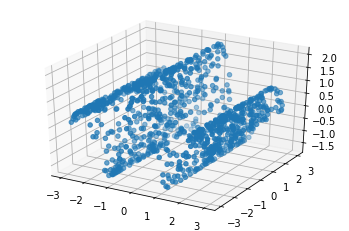

In [7]:
#you cannot play with teh plot in notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)


In [9]:
#in our model we have 2 inputs and 128 nodes in 1 layer and then 1 output function
model = nn.Sequential (
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  train_losses = np.zeros(epochs)
  for it in range(epochs):
    optimizer.zero_grad()
    #Forward Pass
    outputs = model(X_train)
    loss = criterion(outputs,y_train)

    #backward pass
    loss.backward()
    optimizer.step()

    train_losses[it] = loss.item()
    if(it +1) % 50 == 0:
      print(f'Epochs {it+1}/{epochs}, Train Loss: {loss.item():.4f} ')
  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1,1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)



RuntimeError: ignored

In [ ]:
plt.plot(train_losses)